In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-stock-prices-daily-updating/World-Stock-Prices-Dataset.csv


# Chapter 1 : Data Preprocessing

In [7]:
file_path = "/kaggle/input/world-stock-prices-daily-updating/World-Stock-Prices-Dataset.csv"

# Load data
df_v1 = pd.read_csv(file_path)

In [8]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310122 entries, 0 to 310121
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           310122 non-null  object 
 1   Open           310122 non-null  float64
 2   High           310122 non-null  float64
 3   Low            310122 non-null  float64
 4   Close          310122 non-null  float64
 5   Volume         310122 non-null  float64
 6   Brand_Name     310122 non-null  object 
 7   Ticker         310122 non-null  object 
 8   Industry_Tag   310122 non-null  object 
 9   Country        310122 non-null  object 
 10  Dividends      310122 non-null  float64
 11  Stock Splits   310122 non-null  float64
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 30.8+ MB


In [9]:
# Basic info
print("Shape:", df_v1.shape)
print("Columns:", df_v1.columns.tolist())
print("\nSample rows:")
print(df_v1.head())

# Check for missing values
print("\nMissing values:")
print(df_v1.isnull().sum())

# Check unique companies
print("\nUnique companies:")
print(df_v1['Brand_Name'].unique())

Shape: (310122, 13)
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits', 'Capital Gains']

Sample rows:
                        Date        Open        High         Low       Close  \
0  2025-07-03 00:00:00-04:00    6.630000    6.740000    6.615000    6.640000   
1  2025-07-03 00:00:00-04:00  106.750000  108.370003  106.330101  107.339996   
2  2025-07-03 00:00:00-04:00  122.629997  123.050003  121.550003  121.930000   
3  2025-07-03 00:00:00-04:00  221.705002  224.009995  221.360001  223.410004   
4  2025-07-03 00:00:00-04:00  212.145004  214.649994  211.810104  213.550003   

       Volume Brand_Name Ticker Industry_Tag  Country  Dividends  \
0   4209664.0    peloton   PTON      fitness      usa        0.0   
1    560190.0      crocs   CROX     footwear      usa        0.0   
2     36600.0     adidas  ADDYY      apparel  germany        0.0   
3  29295154.0     amazon   AMZN   e-commerce      usa   

In [10]:
df_v1[~df_v1['Capital Gains'].isnull()]

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
17422,2024-07-18 00:00:00-04:00,47.375,47.375,47.375,47.375,0.0,puma,PMMAF,apparel,germany,0.0,0.0,0.0
17471,2024-07-17 00:00:00-04:00,47.375,47.375,47.375,47.375,0.0,puma,PMMAF,apparel,germany,0.0,0.0,0.0


In [11]:
# Check unique stock splits
print("\nUnique Stock Splits:")
print(df_v1['Stock Splits'].unique())

# Check unique tickers
print("\nUnique Ticker:")
print(df_v1['Ticker'].unique())


Unique Stock Splits:
[ 0.         50.         10.          1.196       5.          3.
 20.          4.          0.48732943  2.          7.          1.998
  1.061       1.003       1.004       1.5         1.01368474  1.8
  1.14246544]

Unique Ticker:
['PTON' 'CROX' 'ADDYY' 'AMZN' 'AAPL' 'NKE' 'TGT' 'GOOGL' 'SPOT' 'ZM' 'DIS'
 'RBLX' 'DAL' 'COST' 'LUV' 'AEO' 'TSLA' 'SBUX' 'NVDA' 'CRM' 'HMC' 'CL'
 'HSY' 'CMG' 'PINS' 'LOGI' 'SHOP' 'AMD' 'AXP' 'COIN' 'MA' 'MCD' 'ADBE'
 'UL' 'CSCO' 'JPM' 'ABNB' 'MAR' 'TM' 'HLT' 'HD' 'JNJ' 'UBER' 'PG' 'FDX'
 'MMM' 'PHG' 'FL' 'KO' 'MSFT' 'V' 'LVMUY' 'ZI' 'UBSFY' 'NFLX' 'PMMAF'
 'NTDOY' 'BAMXF' 'POAHY' 'TWTR' 'JWN' 'SQ']


In [12]:
print(df_v1['Ticker'].nunique())
print(df_v1['Brand_Name'].nunique())

62
62


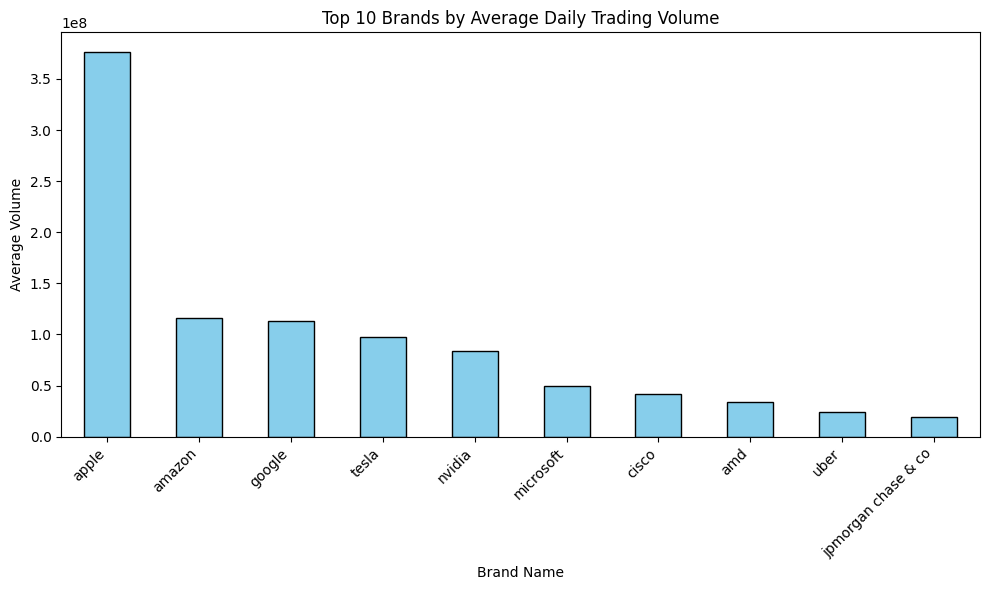

In [13]:
# Group by Brand_Name, calculate average volume
volume_df = df_v1.groupby('Brand_Name')['Volume'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
volume_df.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Brands by Average Daily Trading Volume')
plt.ylabel('Average Volume')
plt.xlabel('Brand Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Chapter 2 : Brand Selection & EDA

**Uber**

In [14]:
# Filter for Uber
df_v2 = df_v1[df_v1['Brand_Name'].str.lower() == 'uber'].copy()

In [15]:
# Convert Date to datetime (let pandas handle timezone removal)
df_v2['Date'] = pd.to_datetime(df_v2['Date'], utc=True).dt.tz_convert(None)


# Drop Capital Gains
df_v2 = df_v2.drop(columns=['Capital Gains'])


# Print info
print("✅ Uber data shape:", df_v2.shape)
print("✅ Date range:", df_v2['Date'].min().date(), "to", df_v2['Date'].max().date())
print("✅ Columns:", df_v2.columns.tolist())

✅ Uber data shape: (1602, 12)
✅ Date range: 2019-05-10 to 2025-07-03
✅ Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Country', 'Dividends', 'Stock Splits']


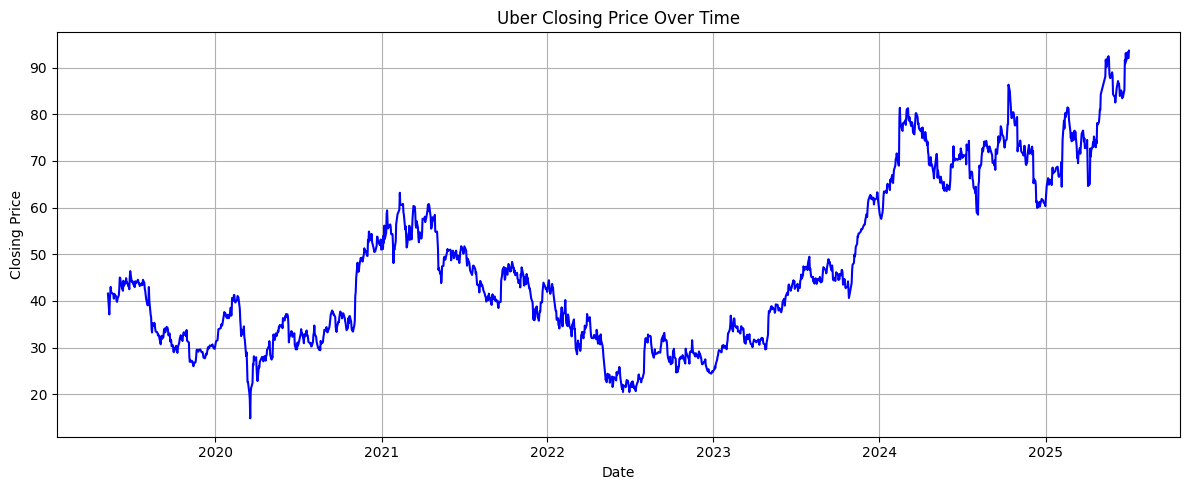

In [16]:
# Closing price plot
plt.figure(figsize=(12, 5))
plt.plot(df_v2['Date'], df_v2['Close'], color='blue')
plt.title('Uber Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

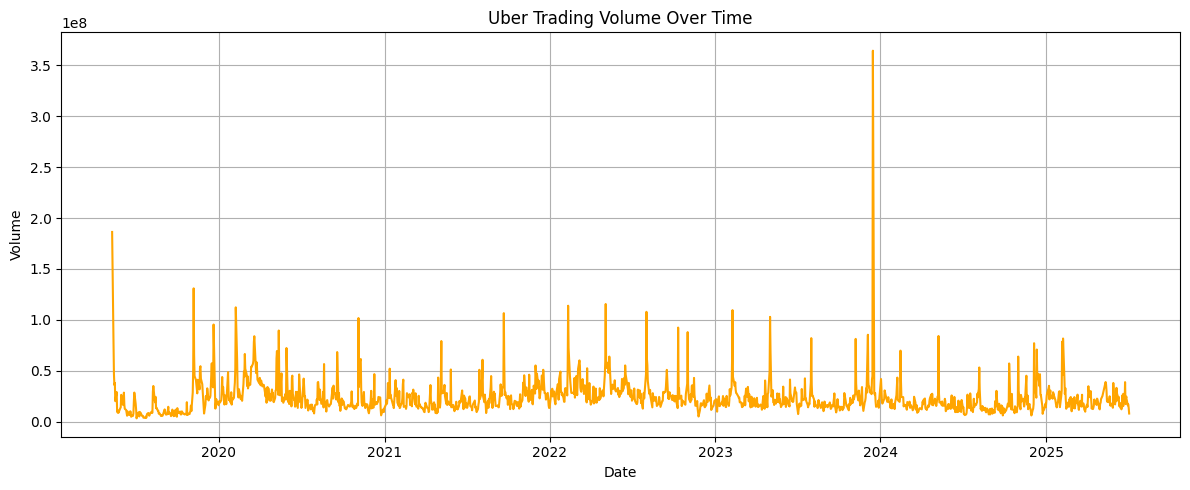

In [17]:
# Volume plot
plt.figure(figsize=(12, 5))
plt.plot(df_v2['Date'], df_v2['Volume'], color='orange')
plt.title('Uber Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

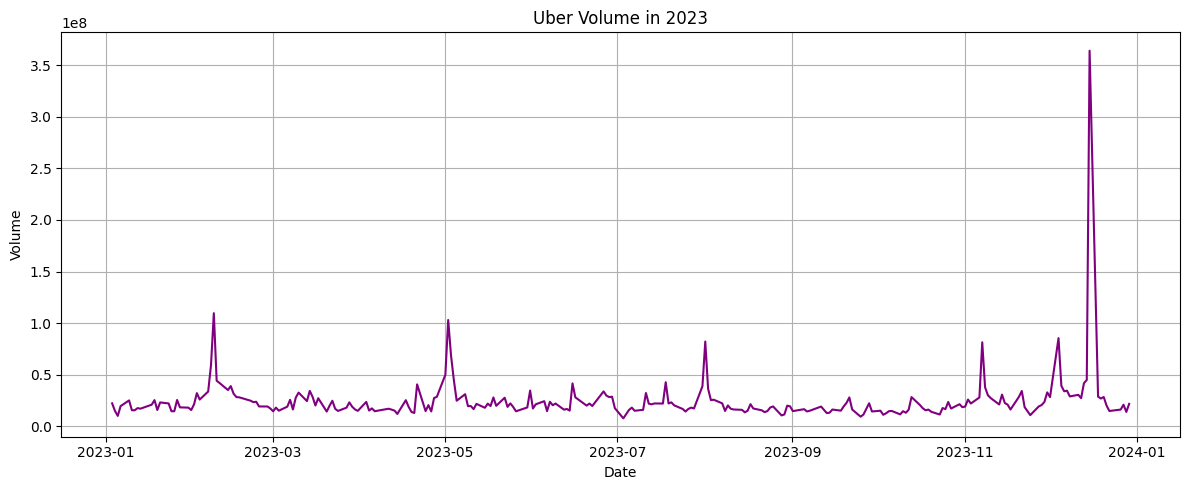

Top 10 volume days in 2023:
                     Date      Close       Volume
26693 2023-12-15 05:00:00  61.860001  364231800.0
39868 2023-02-08 05:00:00  36.830002  109597800.0
36424 2023-05-02 04:00:00  36.520000  102993500.0
27247 2023-12-04 05:00:00  58.630001   85417300.0
32618 2023-08-01 04:00:00  46.650002   82097500.0
28299 2023-11-07 05:00:00  49.919998   81365400.0
36344 2023-05-03 04:00:00  37.840000   68580800.0
39941 2023-02-07 05:00:00  34.900002   59374000.0
36456 2023-05-01 04:00:00  32.740002   49867100.0
36305 2023-05-04 04:00:00  37.490002   44819400.0


In [18]:

df_2023 = df_v2[(df_v2['Date'] >= '2023-01-01') & (df_v2['Date'] <= '2023-12-31')].copy()

# Plot volume
plt.figure(figsize=(12, 5))
plt.plot(df_2023['Date'], df_2023['Volume'], color='purple')
plt.title('Uber Volume in 2023')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find dates with highest volume (e.g. top 5)
top_vol = df_2023.sort_values('Volume', ascending=False).head(10)
print("Top 10 volume days in 2023:")
print(top_vol[['Date', 'Close', 'Volume']])


In [19]:
# df_v2['Volume'].hist(bins=50, figsize=(10,5))

In [20]:
spike_day = df_2023[df_2023['Date'] == pd.to_datetime('2023-12-15 05:00:00')]
print(spike_day[['Date', 'Dividends', 'Stock Splits', 'Close', 'Volume']])

                     Date  Dividends  Stock Splits      Close       Volume
26693 2023-12-15 05:00:00        0.0           0.0  61.860001  364231800.0


In [21]:
threshold = df_v2['Volume'].quantile(0.99)  # top 1% volume as spike threshold
df_v2['High_Volume_Flag'] = (df_v2['Volume'] > threshold).astype(int)

📈 Uber’s 2023-12-15 Spike Context

1. No dividends or splits that day → spike due to unusual trading volume rather than corporate action.
2. Nasdaq after-hours data confirms Uber was among the most actively traded stocks on that date (millions of shares traded). (https://www.nasdaq.com/articles/after-hours-most-active-for-dec-15-2023-:-uber-lcid-pfe-ko-aapl-pcg-ebay-alk-msft-see-csco)
3. No abnormal price drop—closing price stable at $61.86.
4. The spike likely due to high investor interest, possibly anticipation around earnings or investor updates coming soon (Feb 2024 earnings report you found).
5. Could be speculative trading, large block trades, or market maker activity.



In [22]:
# df_v2[df_v2.High_Volume_Flag == 1]

### Features

In [23]:
df_v3 = df_v2.copy()

In [24]:
df_v3 = df_v3.sort_values('Date').reset_index(drop=True)

In [25]:
df_v3['Close_lag1'] = df_v3['Close'].shift(1)
df_v3['Close_lag2'] = df_v3['Close'].shift(2)
df_v3['Close_lag3'] = df_v3['Close'].shift(3)

# Rolling mean and std (volatility)
df_v3['Close_7d_ma'] = df_v3['Close'].rolling(7).mean()
df_v3['Close_7d_std'] = df_v3['Close'].rolling(7).std()

# Daily % change
df_v3['Pct_Change'] = df_v3['Close'].pct_change() * 100

# High volume flag (top 1% volume = spike)
threshold = df_v3['Volume'].quantile(0.99)
df_v3['High_Volume_Flag'] = (df_v3['Volume'] > threshold).astype(int)

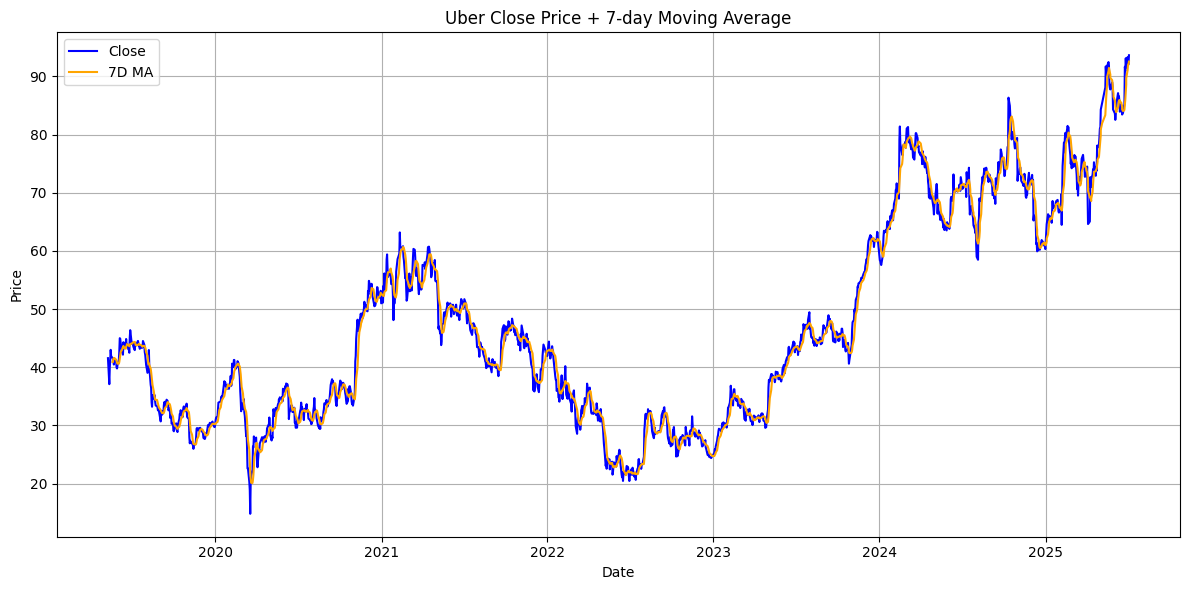

In [26]:
# Plot closing price + 7d MA
plt.figure(figsize=(12,6))
plt.plot(df_v3['Date'], df_v3['Close'], label='Close', color='blue')
plt.plot(df_v3['Date'], df_v3['Close_7d_ma'], label='7D MA', color='orange')
plt.title('Uber Close Price + 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*No extreme differences between daily and moving averages*

In [ ]:
# Plot volatility (7d std)
plt.figure(figsize=(12,6))
plt.plot(df_v3['Date'], df_v3['Close_7d_std'], color='red')
plt.title('Uber 7-day Rolling Volatility (Std Dev)')
plt.xlabel('Date')
plt.ylabel('Std Dev')
plt.grid(True)
plt.tight_layout()
plt.show()

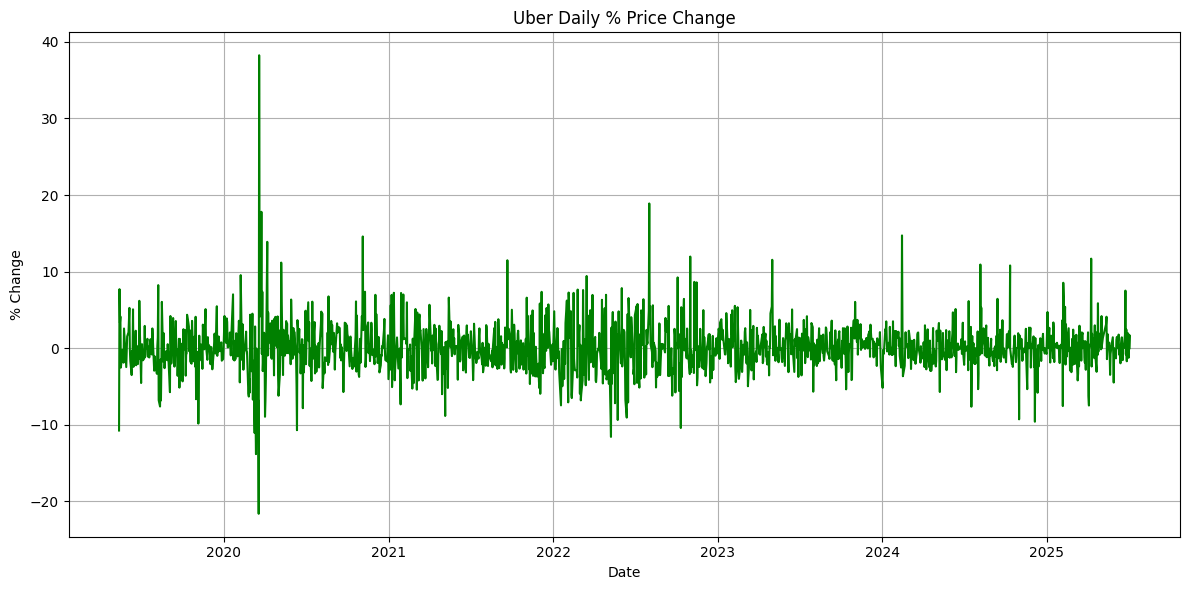

In [28]:
# Plot % change
plt.figure(figsize=(12,6))
plt.plot(df_v3['Date'], df_v3['Pct_Change'], color='green')
plt.title('Uber Daily % Price Change')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)
plt.tight_layout()
plt.show()

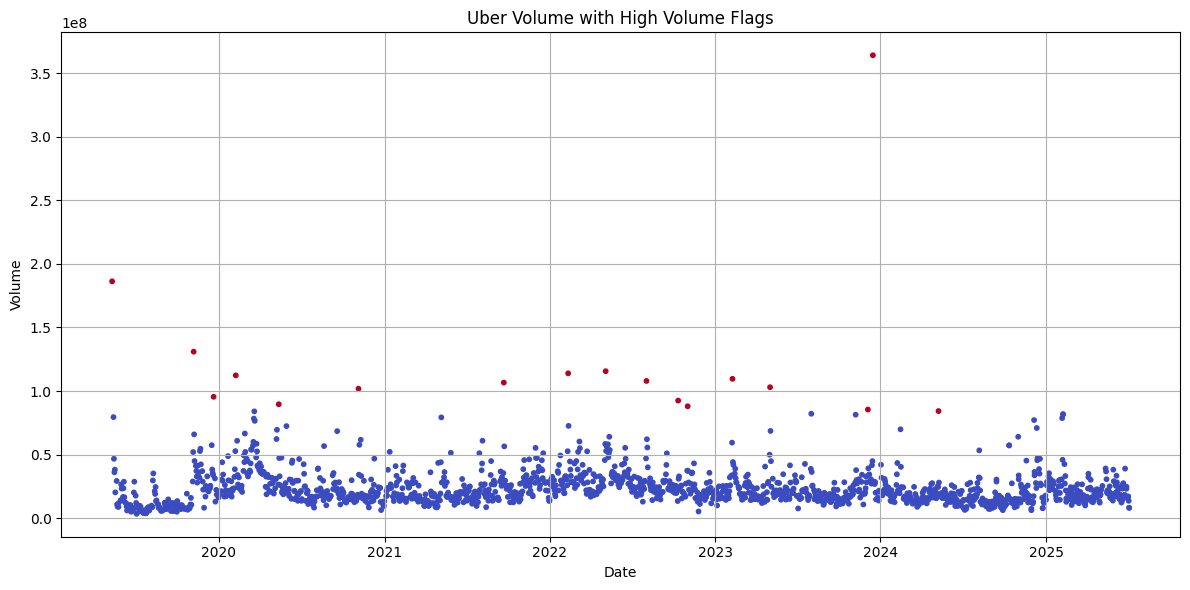

In [29]:
# Highlight high volume spikes
plt.figure(figsize=(12,6))
plt.scatter(df_v3['Date'], df_v3['Volume'], c=df_v3['High_Volume_Flag'], cmap='coolwarm', s=10)
plt.title('Uber Volume with High Volume Flags')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
df_v4 = df_v3.copy()

# Sort by Date
df_v4 = df_v4.sort_values('Date').reset_index(drop=True)

# Create full date range (business days only, since markets close weekends)
full_dates = pd.date_range(start=df_v4['Date'].min(), end=df_v4['Date'].max(), freq='B')

# Check which dates are missing
actual_dates = pd.to_datetime(df_v4['Date'].unique())
missing_dates = set(full_dates) - set(actual_dates)

print(f"✅ Total expected trading days (business days): {len(full_dates)}")
print(f"✅ Actual dates in data: {len(actual_dates)}")
print(f"⚠ Missing trading dates: {len(missing_dates)}")
print(sorted(list(missing_dates))[:10], "...")  # Show first 10 if many

# Check duplicates
duplicate_dates = df_v4['Date'].duplicated().sum()
print(f"⚠ Duplicate dates: {duplicate_dates}")


✅ Total expected trading days (business days): 1605
✅ Actual dates in data: 1540
⚠ Missing trading dates: 580
[Timestamp('2019-05-27 04:00:00'), Timestamp('2019-07-04 04:00:00'), Timestamp('2019-09-02 04:00:00'), Timestamp('2019-11-04 04:00:00'), Timestamp('2019-11-05 04:00:00'), Timestamp('2019-11-06 04:00:00'), Timestamp('2019-11-07 04:00:00'), Timestamp('2019-11-08 04:00:00'), Timestamp('2019-11-11 04:00:00'), Timestamp('2019-11-12 04:00:00')] ...
⚠ Duplicate dates: 62


In [31]:
df_v5 = df_v4.dropna().reset_index(drop=True)
# Aggregate duplicates: mean price, sum volume
df_v5 = df_v5.groupby('Date').agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Volume': 'sum',
    'Dividends': 'mean',
    'Stock Splits': 'mean',
    'Industry_Tag': 'first',
    'Country': 'first',
    'Brand_Name': 'first',
    'Ticker': 'first',
    'Close_lag1': 'mean',
    'Close_lag2': 'mean',
    'Close_lag3': 'mean',
    'Close_7d_ma': 'mean',
    'Close_7d_std': 'mean',
    'Pct_Change': 'mean',
    'High_Volume_Flag': 'max',
}).reset_index()

# Recheck duplicates
duplicates_after = df_v5['Date'].duplicated().sum()
print(f"✅ Duplicate dates after cleaning: {duplicates_after}")

# Recheck missing dates
actual_dates = pd.to_datetime(df_v5['Date'].unique())
missing_dates = set(full_dates) - set(actual_dates)
print(f"✅ Missing trading dates after cleaning: {len(missing_dates)}")
print(sorted(list(missing_dates))[:10], "...")


✅ Duplicate dates after cleaning: 0
✅ Missing trading dates after cleaning: 586
[Timestamp('2019-05-10 04:00:00'), Timestamp('2019-05-13 04:00:00'), Timestamp('2019-05-14 04:00:00'), Timestamp('2019-05-15 04:00:00'), Timestamp('2019-05-16 04:00:00'), Timestamp('2019-05-17 04:00:00'), Timestamp('2019-05-27 04:00:00'), Timestamp('2019-07-04 04:00:00'), Timestamp('2019-09-02 04:00:00'), Timestamp('2019-11-04 04:00:00')] ...


We grouped the dataset by date to remove duplicates — for each date, we averaged price-related columns (Open, High, Low, Close), summed up Volume, and took the first valid entry for text fields like Ticker. This ensures we now have one clean row per trading day. We then rechecked for any remaining duplicates and listed the missing trading dates.

In [32]:
# Ensure dates are sorted
df_v5 = df_v5.sort_values('Date').reset_index(drop=True)

# Compute gap in days between consecutive dates
df_v5['Date'] = pd.to_datetime(df_v5['Date'])
df_v5['Date_Diff'] = df_v5['Date'].diff().dt.days

# Find the largest gap
max_gap = df_v5['Date_Diff'].max()
gap_row = df_v5[df_v5['Date_Diff'] == max_gap]

print(f"✅ Largest gap between trading dates: {max_gap} days")
print(gap_row[['Date', 'Date_Diff']])

✅ Largest gap between trading dates: 7.0 days
                    Date  Date_Diff
1497 2025-05-12 04:00:00        7.0


📌 What does the 7-day gap mean?
👉 The largest gap is 7 days between two trading dates, ending at 2025-05-12.

👉 This is normal for stock data — could be due to:

* a long holiday weekend
* market closure for public holidays
* or data update lag

👉 Nothing unusual or problematic — it’s within what stock models expect (weekends + holidays can add up to 7 days).



# Chapter 3 : Model Building

In [33]:
# Final version for modeling
df_v6 = df_v5.copy()

# Drop the Date_Diff helper column
if 'Date_Diff' in df_v6.columns:
    df_v6 = df_v6.drop(columns=['Date_Diff'])

print(f"✅ df_v6 saved. Shape: {df_v6.shape}")
print("✅ Columns:", df_v6.columns.tolist())

✅ df_v6 saved. Shape: (1534, 19)
✅ Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Industry_Tag', 'Country', 'Brand_Name', 'Ticker', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_7d_ma', 'Close_7d_std', 'Pct_Change', 'High_Volume_Flag']


📌 Why we’re skipping ARIMA / Exponential Smoothing / classic time series models
👉 Based on best practices + project goals, here’s why:

1️⃣ 📈 Stock market data = highly volatile + non-linear

ARIMA works well when trends + seasonality dominate

Stock prices are noisy, jumpy, influenced by many external factors → ARIMA struggles to capture this complexity

2️⃣ ⚡ We want to engineer rich features

ARIMA only uses past values of the target → can’t take advantage of our lags, volatility, high volume flag, etc

ML/DL can easily use these + any future features

3️⃣ 🚀 Deployment focus (Streamlit app)

ML/DL models integrate better into modern apps

Libraries like scikit-learn and Keras offer more flexibility for deployment

4️⃣ 🔍 Tuning and scalability

ARIMA needs lots of parameter tuning (p,d,q) per stock and can break with missing dates

ML/DL can generalize better with tuned hyperparameters



In [34]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

# Walk-forward train/test split
def walk_forward_split(df, test_size=30):
    train = df.iloc[:-test_size]
    test = df.iloc[-test_size:]
    return train, test

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae}

# Plot helper (for final comparison later)
def plot_predictions(dates, y_true, y_pred, title):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,6))
    plt.plot(dates, y_true, label='Actual')
    plt.plot(dates, y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Save model
def save_model(model, filename):
    joblib.dump(model, f'models/{filename}.pkl')
    print(f"✅ Model saved: models/{filename}.pkl")


In [35]:
# Split
train, test = walk_forward_split(df_v6, test_size=30)
feature_cols = ['Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_7d_ma', 'Close_7d_std', 'High_Volume_Flag']

## 🔹 Gradient Boosting Regressor (XGBoost)

In [36]:
from xgboost import XGBRegressor

def run_xgboost(train, test, feature_cols, target_col='Close'):
    X_train = train[feature_cols]
    y_train = train[target_col]
    X_test = test[feature_cols]
    y_test = test[target_col]

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    metrics = evaluate_model(y_test, preds)
    print(f"XGBoost Metrics: {metrics}")
    return y_test, preds

In [37]:
y_true_xgb, preds_xgb = run_xgboost(train, test, feature_cols)

XGBoost Metrics: {'RMSE': 4.20261802798776, 'MAE': 3.7506388346354154}


## 🔹 Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

def run_random_forest(train, test, feature_cols, target_col='Close'):
    X_train = train[feature_cols]
    y_train = train[target_col]
    X_test = test[feature_cols]
    y_test = test[target_col]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    metrics = evaluate_model(y_test, preds)
    print(f"Random Forest Metrics: {metrics}")
    return y_test, preds


In [39]:
y_true_rf, preds_rf = run_random_forest(train, test, feature_cols)

Random Forest Metrics: {'RMSE': 2.8354472625915763, 'MAE': 2.480406224568683}


## 🔹 LSTM 

In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def run_lstm(train, test, feature_cols, target_col='Close'):
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train[feature_cols + [target_col]])
    test_scaled = scaler.transform(test[feature_cols + [target_col]])

    X_train = train_scaled[:, :-1]
    y_train = train_scaled[:, -1]
    X_test = test_scaled[:, :-1]
    y_test = test_scaled[:, -1]

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

    preds_scaled = model.predict(X_test).flatten()

    # Inverse scale predictions & actual
    preds_full = np.hstack((X_test[:,0,:], preds_scaled.reshape(-1,1)))
    preds_inverse = scaler.inverse_transform(preds_full)[:,-1]

    actual_full = np.hstack((X_test[:,0,:], y_test.reshape(-1,1)))
    actual_inverse = scaler.inverse_transform(actual_full)[:,-1]

    metrics = evaluate_model(actual_inverse, preds_inverse)
    print(f"LSTM Metrics: {metrics}")

    return actual_inverse, preds_inverse


🧾 LSTM Model Architecture & Design Rationale

This project uses a modified form of Long Short-Term Memory (LSTM) to forecast stock closing prices. Instead of feeding raw sequences of past prices (as done in classical time-series LSTM), the model uses a single timestep per sample with engineered temporal features. This decision was driven by two key factors:

⚠️ 1. Handling Missing Dates

The dataset contains non-continuous dates, with several missing trading days due to market closures and data irregularities. Classical sequence-based LSTM architectures assume regular, uninterrupted time intervals. Feeding in raw sequences when days are missing would risk misrepresenting temporal patterns.

To address this, engineered features such as lag values (previous 3 closes), 7-day moving averages, and rolling standard deviations are used. These encapsulate temporal dynamics without requiring strict date continuity.

📊 2. Rich Feature Representation

In addition to lagged prices, the input includes features like volatility (7-day rolling std) and an event flag for unusually high volume. These are more naturally used in a tabular input format. An LSTM model with one timestep per sample still benefits from internal memory and nonlinearity to model complex interactions between these time-dependent features.

In [41]:
y_true_lstm, preds_lstm = run_lstm(train, test, feature_cols)

2025-07-08 09:39:42.487255: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
LSTM Metrics: {'RMSE': 2.153997274327824, 'MAE': 1.651276809908967}


## Model Comparison

### 30 days Test

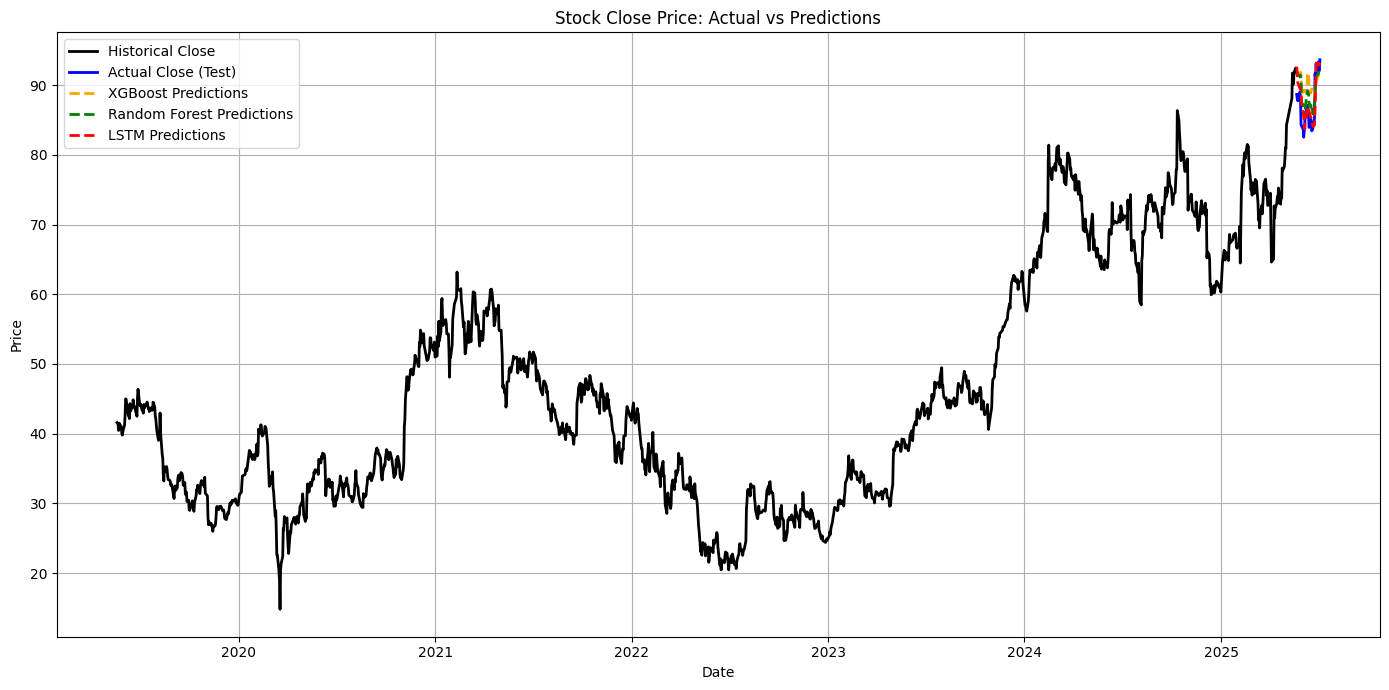

In [42]:


def plot_model_comparison(df, test, y_true_xgb, preds_xgb, y_true_rf, preds_rf, y_true_lstm, preds_lstm, test_size=30):
    plt.figure(figsize=(14,7))

    # Plot full past data before test period
    plt.plot(df['Date'][:-test_size], df['Close'][:-test_size], label='Historical Close', color='black', linewidth=2)

    # Actual prices during test period
    plt.plot(test['Date'], test['Close'], label='Actual Close (Test)', color='blue', linewidth=2)

    # Predictions (dotted lines)
    plt.plot(test['Date'], preds_xgb, '--', label='XGBoost Predictions', color='orange', linewidth=2)
    plt.plot(test['Date'], preds_rf, '--', label='Random Forest Predictions', color='green', linewidth=2)
    plt.plot(test['Date'], preds_lstm, '--', label='LSTM Predictions', color='red', linewidth=2)

    plt.title('Stock Close Price: Actual vs Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage
plot_model_comparison(df_v6, test, y_true_xgb, preds_xgb, y_true_rf, preds_rf, y_true_lstm, preds_lstm)

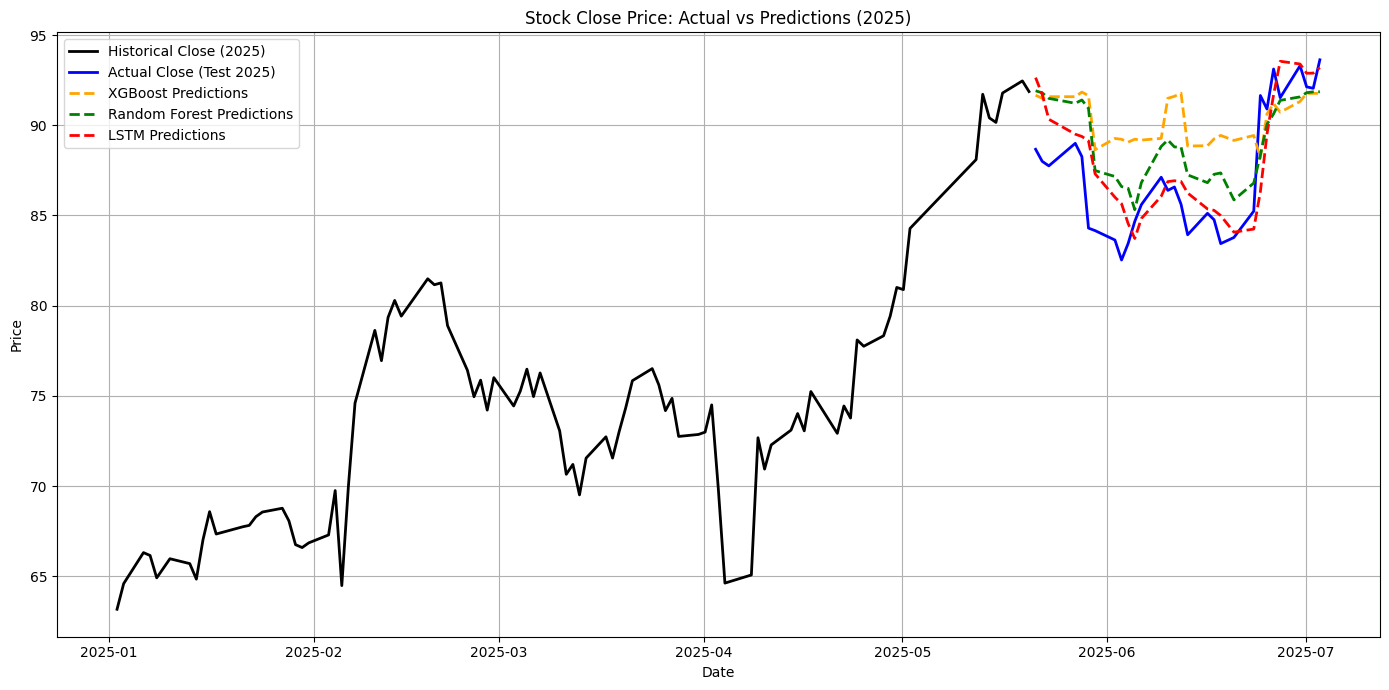

In [43]:

def plot_2025_model_comparison(df, test, y_true_xgb, preds_xgb, y_true_rf, preds_rf, y_true_lstm, preds_lstm):
    # Filter to 2025 only
    df_2025 = df[(df['Date'] >= '2025-01-01') & (df['Date'] <= '2025-12-31')]
    test_2025 = test[(test['Date'] >= '2025-01-01') & (test['Date'] <= '2025-12-31')]

    plt.figure(figsize=(14,7))

    # Historical close before test period but still in 2025
    historical_mask = (df_2025['Date'] < test_2025['Date'].min())
    plt.plot(df_2025.loc[historical_mask, 'Date'], df_2025.loc[historical_mask, 'Close'], label='Historical Close (2025)', color='black', linewidth=2)

    # Actual close in test period (2025)
    plt.plot(test_2025['Date'], test_2025['Close'], label='Actual Close (Test 2025)', color='blue', linewidth=2)

    # Predictions (dotted)
    plt.plot(test_2025['Date'], preds_xgb[-len(test_2025):], '--', label='XGBoost Predictions', color='orange', linewidth=2)
    plt.plot(test_2025['Date'], preds_rf[-len(test_2025):], '--', label='Random Forest Predictions', color='green', linewidth=2)
    plt.plot(test_2025['Date'], preds_lstm[-len(test_2025):], '--', label='LSTM Predictions', color='red', linewidth=2)

    plt.title('Stock Close Price: Actual vs Predictions (2025)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage:
plot_2025_model_comparison(df_v6, test, y_true_xgb, preds_xgb, y_true_rf, preds_rf, y_true_lstm, preds_lstm)


In [44]:


def create_comparison_table(test, preds_xgb, preds_rf, preds_lstm):
    df_compare = test[['Date', 'Close']].copy()
    df_compare['XGBoost_Pred'] = preds_xgb
    df_compare['RandomForest_Pred'] = preds_rf
    df_compare['LSTM_Pred'] = preds_lstm
    return df_compare

# Usage
comparison_table = create_comparison_table(test, preds_xgb, preds_rf, preds_lstm)
display(comparison_table.tail(30))  # last 30 days table


,Date,Close,XGBoost_Pred,RandomForest_Pred,LSTM_Pred
1504,2025-05-21 04:00:00,88.669998,91.665848,91.913001,92.640646
1505,2025-05-22 04:00:00,88.000000,91.495186,91.797702,91.700334
1506,2025-05-23 04:00:00,87.750000,91.584808,91.490700,90.333296
1507,2025-05-27 04:00:00,89.000000,91.584808,91.219800,89.507241
1508,2025-05-28 04:00:00,88.260002,91.841049,91.401601,89.379077
1509,2025-05-29 04:00:00,84.300003,91.641571,90.935702,89.138219
1510,2025-05-30 04:00:00,84.160004,88.645676,87.487200,87.307545
1511,2025-06-02 04:00:00,83.639999,89.268478,87.161900,86.010603
1512,2025-06-03 04:00:00,82.529999,89.222710,86.601700,85.650818
1513,2025-06-04 04:00:00,83.449997,89.065636,86.501100,84.550775


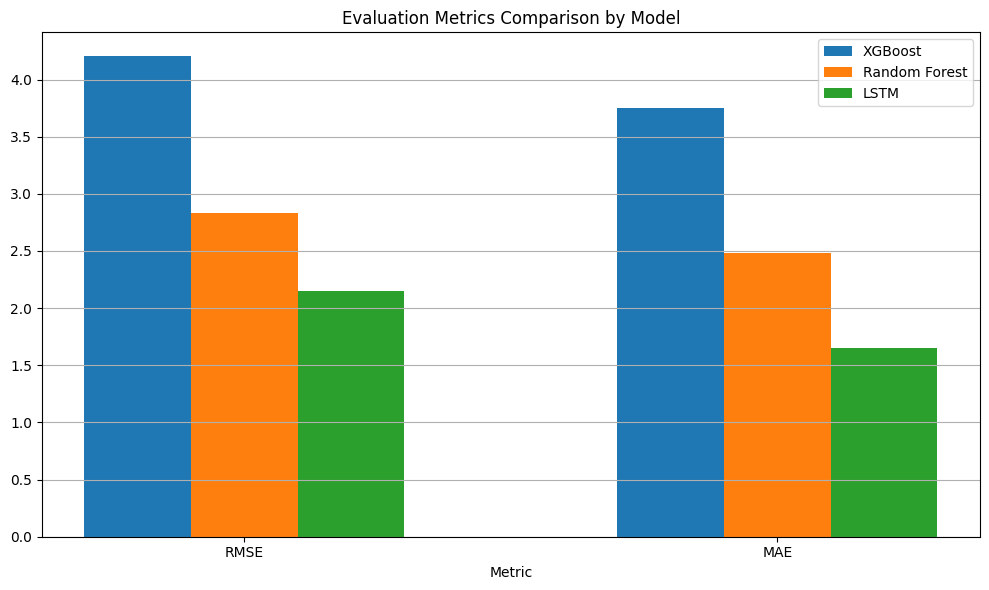

In [45]:

# After running models:
metrics_xgb = evaluate_model(y_true_xgb, preds_xgb)
metrics_rf = evaluate_model(y_true_rf, preds_rf)
metrics_lstm = evaluate_model(y_true_lstm, preds_lstm)


def plot_evaluation_comparison_grouped(metrics_xgb, metrics_rf, metrics_lstm):
    metrics_df = pd.DataFrame({
        'Model': ['XGBoost', 'Random Forest', 'LSTM'],
        'RMSE': [metrics_xgb['RMSE'], metrics_rf['RMSE'], metrics_lstm['RMSE']],
        'MAE': [metrics_xgb['MAE'], metrics_rf['MAE'], metrics_lstm['MAE']]
    })

    labels = ['RMSE', 'MAE']
    models = metrics_df['Model'].values
    rmse_values = metrics_df['RMSE'].values
    mae_values = metrics_df['MAE'].values

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))

    # Bars for each model in each metric group
    ax.bar(x - width, [rmse_values[0], mae_values[0]], width, label='XGBoost')
    ax.bar(x, [rmse_values[1], mae_values[1]], width, label='Random Forest')
    ax.bar(x + width, [rmse_values[2], mae_values[2]], width, label='LSTM')

    ax.set_xlabel('Metric')
    ax.set_title('Evaluation Metrics Comparison by Model')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(axis='y')

    plt.tight_layout()
    plt.show()

# Usage
plot_evaluation_comparison_grouped(metrics_xgb, metrics_rf, metrics_lstm)



📌 Summary

👉 XGBoost: Flat predictions, fails to track market dynamics.

👉 Random Forest: Modest response, better than XGB but still underreacts.

👉 LSTM: Best at adapting to trend changes; slight over/under at times but closer.

### 90 days Test

In [46]:
# Let's try 90-day test set
TEST_SIZE = 90

train_large = df_v6.iloc[:-TEST_SIZE].copy()
test_large = df_v6.iloc[-TEST_SIZE:].copy()

print(f"Train size: {train_large.shape}")
print(f"Test size: {test_large.shape}")

Train size: (1444, 19)
Test size: (90, 19)


In [47]:
y_true_xgb_90d, preds_xgb_90d = run_xgboost(train_large, test_large, feature_cols)
y_true_rf_90d, preds_rf_90d = run_random_forest(train_large, test_large, feature_cols)
y_true_lstm_90d, preds_lstm_90d = run_lstm(train_large, test_large, feature_cols)

XGBoost Metrics: {'RMSE': 5.955159580937463, 'MAE': 4.468916744656033}
Random Forest Metrics: {'RMSE': 4.341172364541939, 'MAE': 3.1061972338358577}
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
LSTM Metrics: {'RMSE': 2.124746941691075, 'MAE': 1.5479034088223822}


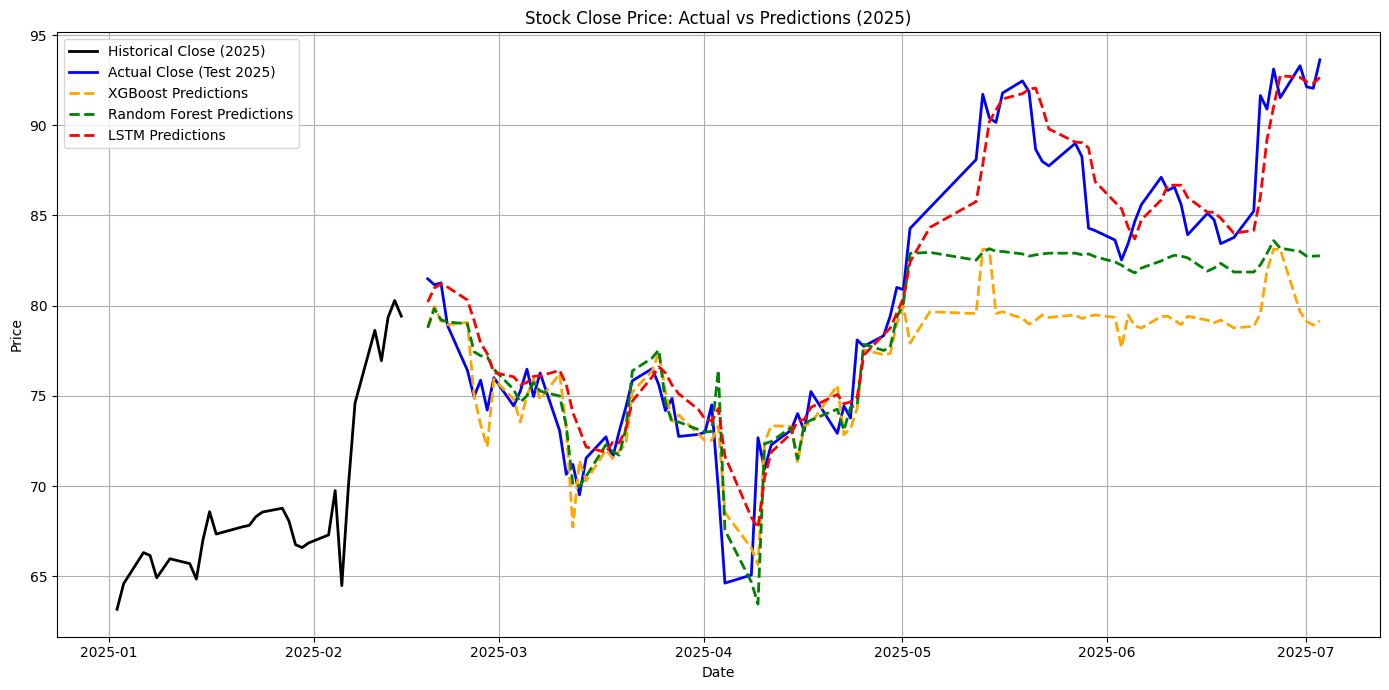

In [48]:
# Usage:
plot_2025_model_comparison(df_v6, test_large, y_true_xgb_90d, preds_xgb_90d, y_true_rf_90d, preds_rf_90d, y_true_lstm_90d, preds_lstm_90d)

## Model Tuning

🔍 LSTM Hyperparameter Tuning Summary

In this experiment, a range of LSTM model configurations were tested to identify the best-performing architecture for forecasting stock closing prices. The tuning process involved systematically varying four main hyperparameters:

- LSTM Units: Number of memory cells (32, 64, 128)
- Dropout Rate: Regularization to prevent overfitting (0.0, 0.1, 0.2, 0.3)
- Epochs: Number of training cycles (30, 40, 50, 60)
- Batch Size: Mini-batch size used during training (16, 32)

The dataset was split into a training set and a 90-day test set. Eight combinations of the above parameters were evaluated using Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

In [51]:
def evaluate_model(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

def run_lstm_tuned(train, test, feature_cols, lstm_units=50, dropout_rate=0.0, 
                   epochs=20, batch_size=16, target_col='Close'):
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train[feature_cols + [target_col]])
    test_scaled = scaler.transform(test[feature_cols + [target_col]])

    X_train = train_scaled[:, :-1]
    y_train = train_scaled[:, -1]
    X_test = test_scaled[:, :-1]
    y_test = test_scaled[:, -1]

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    preds_scaled = model.predict(X_test).flatten()

    preds_full = np.hstack((X_test[:, 0, :], preds_scaled.reshape(-1, 1)))
    preds_inverse = scaler.inverse_transform(preds_full)[:, -1]

    actual_full = np.hstack((X_test[:, 0, :], y_test.reshape(-1, 1)))
    actual_inverse = scaler.inverse_transform(actual_full)[:, -1]

    metrics = evaluate_model(actual_inverse, preds_inverse)
    return actual_inverse, preds_inverse, metrics


In [73]:
import tensorflow as tf
import random
import os

SEED = 24
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

extended_configs = [
    {'lstm_units': 32, 'dropout_rate': 0.0, 'epochs': 50, 'batch_size': 16},
    {'lstm_units': 32, 'dropout_rate': 0.2, 'epochs': 50, 'batch_size': 16},
    {'lstm_units': 64, 'dropout_rate': 0.3, 'epochs': 50, 'batch_size': 16},
    {'lstm_units': 64, 'dropout_rate': 0.0, 'epochs': 30, 'batch_size': 16},
    {'lstm_units': 128, 'dropout_rate': 0.2, 'epochs': 50, 'batch_size': 32},
    {'lstm_units': 128, 'dropout_rate': 0.3, 'epochs': 60, 'batch_size': 32},
    {'lstm_units': 64, 'dropout_rate': 0.1, 'epochs': 40, 'batch_size': 16},
    {'lstm_units': 64, 'dropout_rate': 0.3, 'epochs': 30, 'batch_size': 16},
]


extended_results = []

for cfg in extended_configs:
    actuals, preds, metrics = run_lstm_tuned(
        train_large, test_large, feature_cols,
        lstm_units=cfg['lstm_units'],
        dropout_rate=cfg['dropout_rate'],
        epochs=cfg['epochs'],
        batch_size=cfg['batch_size']
    )
    extended_results.append({
        'Config': f"U{cfg['lstm_units']}_D{cfg['dropout_rate']}_E{cfg['epochs']}_B{cfg['batch_size']}",
        'RMSE': metrics['RMSE'],
        'MAE': metrics['MAE'],
        'Actuals': actuals,
        'Predictions': preds
    })


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [74]:
results_df = pd.DataFrame(extended_results)[['Config', 'RMSE', 'MAE']]

In [77]:
results_df

,Config,RMSE,MAE
0,U32_D0.0_E50_B16,2.000839,1.562428
1,U32_D0.2_E50_B16,2.517869,2.083331
2,U64_D0.3_E50_B16,1.929778,1.432201
3,U64_D0.0_E30_B16,2.063610,1.634288
4,U128_D0.2_E50_B32,2.141458,1.694228
5,U128_D0.3_E60_B32,2.341559,1.891955
6,U64_D0.1_E40_B16,2.229945,1.819277
7,U64_D0.3_E30_B16,2.155896,1.701214


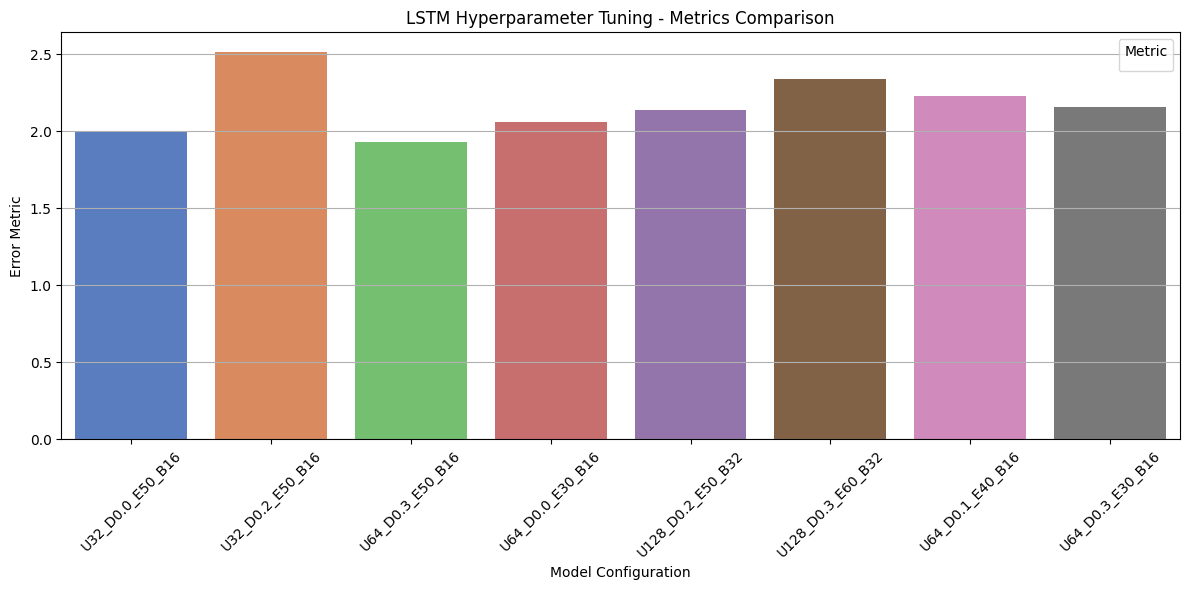

In [84]:
import seaborn as sns
# If you already have results_df defined
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    results_df,
    x='Config', y='RMSE', palette='muted'
)

plt.title('LSTM Hyperparameter Tuning - Metrics Comparison')
plt.xlabel('Model Configuration')
plt.ylabel('Error Metric')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

The best-performing configuration was:

- Units: 64
- Dropout: 0.3
- Epochs: 50
- Batch Size: 16

This configuration achieved the lowest RMSE and MAE, indicating that it generalizes well without overfitting. A balance between model complexity and regularization appears to have contributed to its superior performance.